In [1]:
import ipeadatapy as ipea
import pandas as pd

df = ipea.list_series()
df

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABQUBV,Abate - bovinos - quantidade
2,ABATE12_ABPEVA12,Abate - vacas - peso das carcaças
3,ABATE12_ABQUBO12,Abate - bois - quantidade
4,ABATE12_ABQUBV12,Abate - bovinos - quantidade
...,...,...
2821,PNADCT_TXPARTCUF_SI,Taxa de participação - sem instrução ou equiva...
2822,PNAD_IAGRV,Domicílios com insegurança alimentar grave
2823,PNAD_IALEV,Domicílios com insegurança alimentar leve
2824,PNAD_IAMOD,Domicílios com insegurança alimentar moderada


In [2]:
df[df['NAME'].str.contains('Imposto', case=False, na=False)]

,CODE,NAME
600,CONFAZ12_ICMSN12,Imposto sobre a circulação de mercadorias (ICM...
601,CONFAZ12_IPVA12,Imposto sobre a propriedade de veículos automo...
602,CONFAZ12_ITCD12,Imposto sobre transmissão causa mortis e doaçã...
670,RECPROPCH,Arrecadação total dos impostos municipais (IPT...
672,RECTRIBE,"Receita corrente - receita bruta - impostos, t..."
673,RECTRIBM,"Receita corrente - receita bruta - impostos, t..."
674,REICMSE,"Receita corrente - receita bruta - impostos, t..."
677,RIPTUM,"Receita corrente - receita bruta - impostos, t..."
679,RISSM,"Receita corrente - receita bruta - impostos, t..."
682,RTAXASM,"Receita corrente - receita bruta - impostos, t..."


In [24]:
import pandas as pd

imposto_importacao = ipea.timeseries('SRF12_II12').groupby('YEAR')['VALUE (R$)'].sum().reset_index(name='VALOR')

imposto_importacao

,YEAR,VALOR
0,1986,0.000006
1,1987,0.000016
2,1988,0.000126
3,1989,0.001828
4,1990,0.044884
5,1991,0.250855
6,1992,2.544304
7,1993,63.102176
8,1994,2384.140110
9,1995,4910.944019


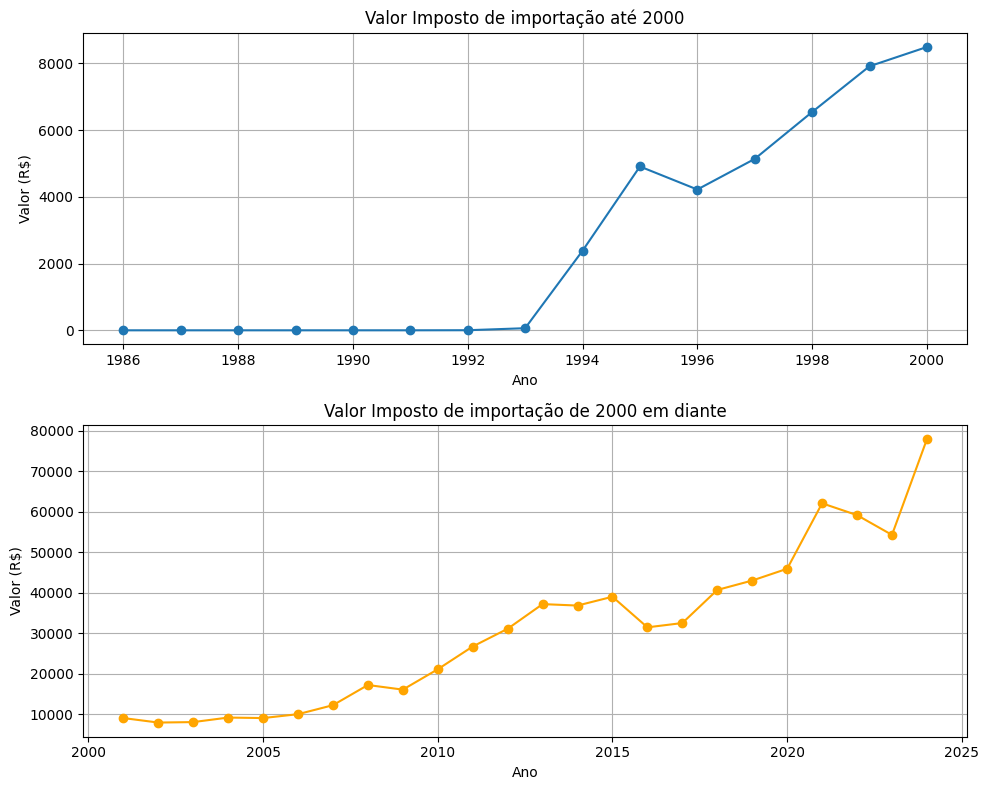

In [27]:
import matplotlib.pyplot as plt

df_ate_2000 = imposto_importacao[imposto_importacao['YEAR'] <= 2000]
df_depois_2000 = imposto_importacao[imposto_importacao['YEAR'] > 2000]

# Criando os subplots (2 gráficos)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Primeiro gráfico: até 2000
axes[0].plot(df_ate_2000['YEAR'], df_ate_2000['VALOR'], marker='o')
axes[0].set_title('Valor Imposto de importação até 2000')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor (R$)')
axes[0].grid(True)

# Segundo gráfico: de 2000 em diante
axes[1].plot(df_depois_2000['YEAR'], df_depois_2000['VALOR'], marker='o', color='orange')
axes[1].set_title('Valor Imposto de importação de 2000 em diante')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Valor (R$)')
axes[1].grid(True)

plt.tight_layout()
plt.show()
plt.show()

In [28]:
import pandas as pd

imposto_ipva = ipea.timeseries('CONFAZ12_IPVA12').groupby('YEAR')['VALUE (R$)'].sum().reset_index(name='VALOR')

imposto_ipva

,YEAR,VALOR
0,1996,8.640000e+02
1,1997,4.300286e+06
2,1998,4.455215e+06
3,1999,4.485045e+06
4,2000,5.297023e+06
5,2001,6.288439e+06
6,2002,7.017775e+06
7,2003,7.739887e+06
8,2004,8.912337e+06
9,2005,1.049710e+07


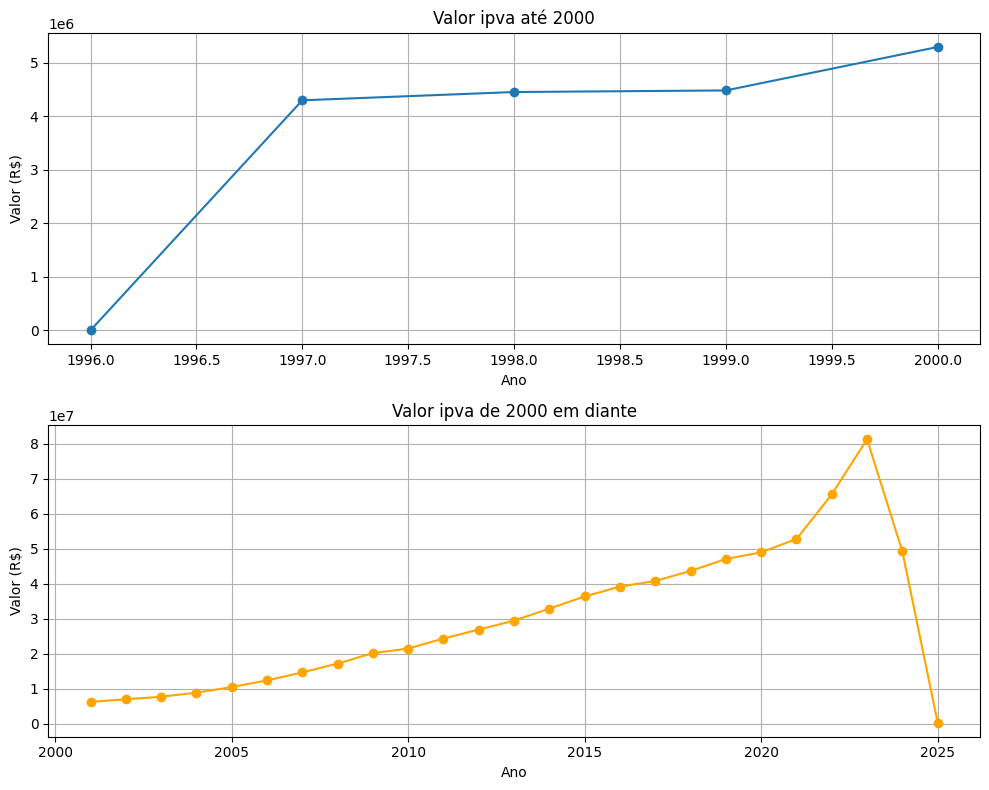

In [29]:
import matplotlib.pyplot as plt

df_ate_2000 = imposto_ipva[imposto_ipva['YEAR'] <= 2000]
df_depois_2000 = imposto_ipva[imposto_ipva['YEAR'] > 2000]

# Criando os subplots (2 gráficos)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Primeiro gráfico: até 2000
axes[0].plot(df_ate_2000['YEAR'], df_ate_2000['VALOR'], marker='o')
axes[0].set_title('Valor ipva até 2000')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor (R$)')
axes[0].grid(True)

# Segundo gráfico: de 2000 em diante
axes[1].plot(df_depois_2000['YEAR'], df_depois_2000['VALOR'], marker='o', color='orange')
axes[1].set_title('Valor ipva de 2000 em diante')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Valor (R$)')
axes[1].grid(True)

plt.tight_layout()
plt.show()
plt.show()

In [31]:
import pandas as pd

imposto_produtos_industrializados = ipea.timeseries('SRF12_IPI12').groupby('YEAR')['VALUE (R$)'].sum().reset_index(name='VALOR')

imposto_produtos_industrializados

,YEAR,VALOR
0,1986,0.000030
1,1987,0.000107
2,1988,0.000696
3,1989,0.009950
4,1990,0.279819
5,1991,1.294099
6,1992,14.992972
7,1993,347.300940
8,1994,10423.316535
9,1995,13635.133358


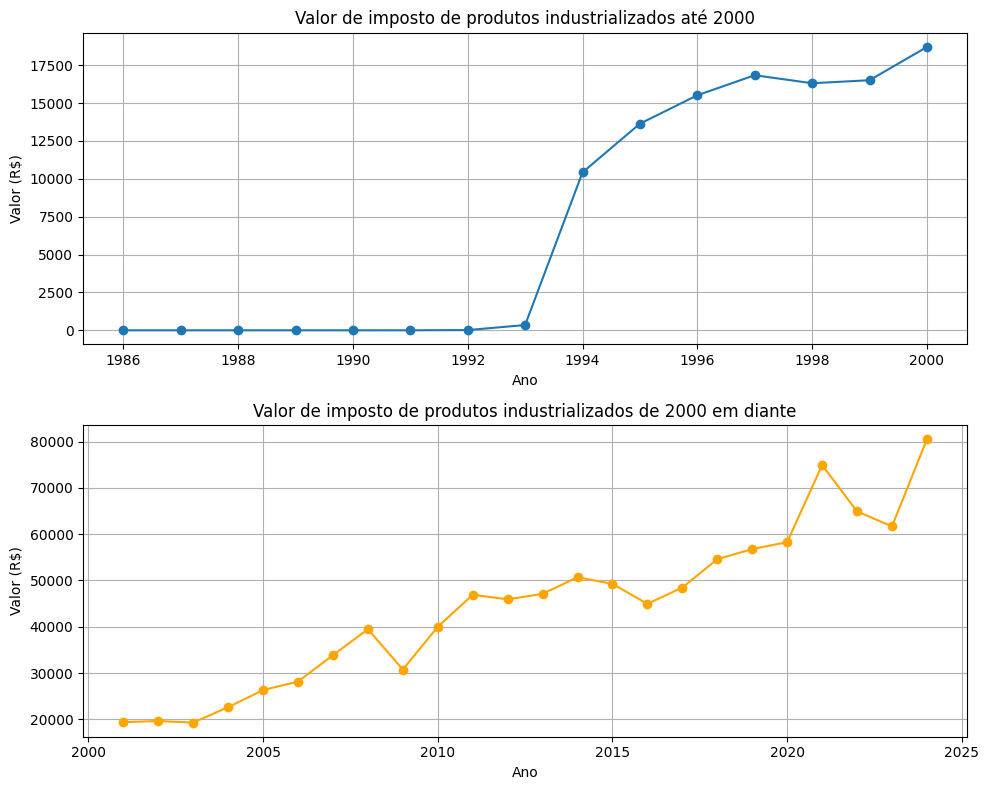

In [32]:
import matplotlib.pyplot as plt

df_ate_2000 = imposto_produtos_industrializados[imposto_produtos_industrializados['YEAR'] <= 2000]
df_depois_2000 = imposto_produtos_industrializados[imposto_produtos_industrializados['YEAR'] > 2000]

# Criando os subplots (2 gráficos)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Primeiro gráfico: até 2000
axes[0].plot(df_ate_2000['YEAR'], df_ate_2000['VALOR'], marker='o')
axes[0].set_title('Valor de imposto de produtos industrializados até 2000')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor (R$)')
axes[0].grid(True)

# Segundo gráfico: de 2000 em diante
axes[1].plot(df_depois_2000['YEAR'], df_depois_2000['VALOR'], marker='o', color='orange')
axes[1].set_title('Valor de imposto de produtos industrializados de 2000 em diante')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Valor (R$)')
axes[1].grid(True)

plt.tight_layout()
plt.show()
plt.show()

In [33]:
import pandas as pd

itcmd = ipea.timeseries('CONFAZ12_ITCD12').groupby('YEAR')['VALUE (R$)'].sum().reset_index(name='VALOR')

itcmd


,YEAR,VALOR
0,1996,2.300000e+01
1,1997,2.723941e+08
2,1998,3.174005e+08
3,1999,3.004742e+08
4,2000,3.287374e+08
5,2001,3.388879e+08
6,2002,5.189752e+08
7,2003,8.742294e+08
8,2004,7.106154e+08
9,2005,7.946547e+08


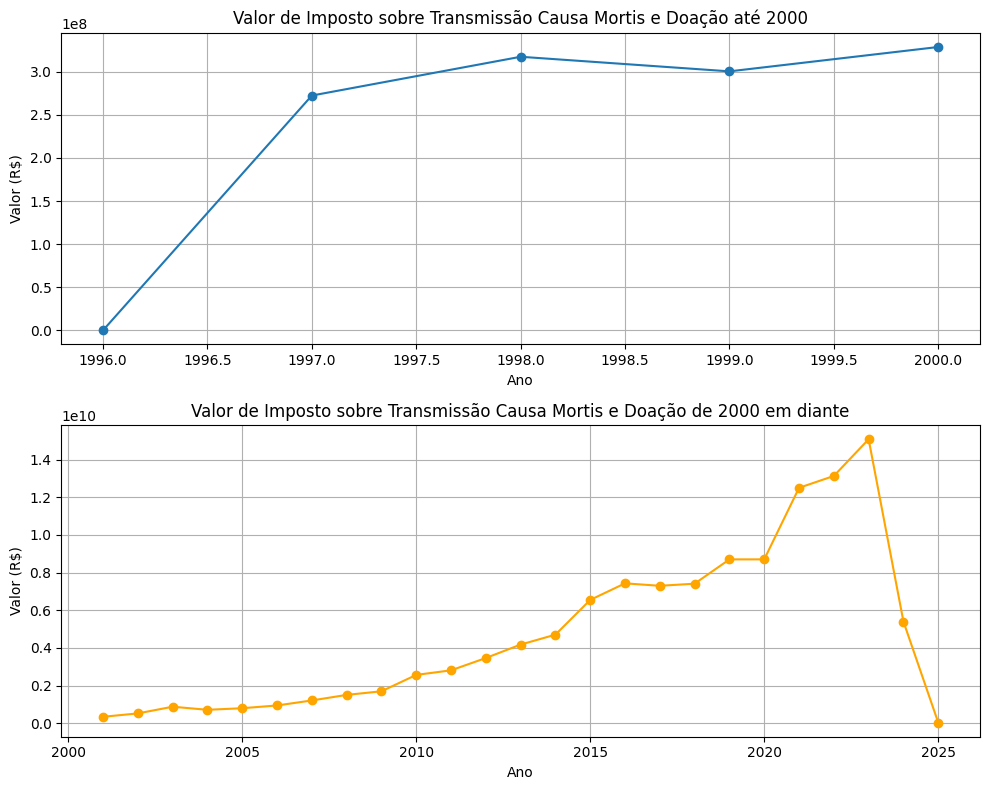

In [34]:
import matplotlib.pyplot as plt

df_ate_2000 = itcmd[itcmd['YEAR'] <= 2000]
df_depois_2000 = itcmd[itcmd['YEAR'] > 2000]

# Criando os subplots (2 gráficos)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Primeiro gráfico: até 2000
axes[0].plot(df_ate_2000['YEAR'], df_ate_2000['VALOR'], marker='o')
axes[0].set_title('Valor de Imposto sobre Transmissão Causa Mortis e Doação até 2000')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor (R$)')
axes[0].grid(True)

# Segundo gráfico: de 2000 em diante
axes[1].plot(df_depois_2000['YEAR'], df_depois_2000['VALOR'], marker='o', color='orange')
axes[1].set_title('Valor de Imposto sobre Transmissão Causa Mortis e Doação de 2000 em diante')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Valor (R$)')
axes[1].grid(True)

plt.tight_layout()
plt.show()
plt.show()

In [ ]:
import pandas as pd

imposto_fisico = ipea.timeseries('SRF12_IRPF12')
imposto_fisico = imposto_fisico.assign(TIPO=lambda x: "Fisico")

imposto_juridico = ipea.timeseries('SRF12_IRPJ12')
imposto_juridico = imposto_juridico.assign(TIPO=lambda x: "Jurídico")

imposto_total = pd.concat([imposto_fisico, imposto_juridico], axis=0)
imposto_total

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$),TIPO
DATE,,,,,,,
1986-01-01,SRF12_IRPF12,1986-01-01T00:00:00-02:00,1,1,1986,1.757145e-07,Fisico
1986-02-01,SRF12_IRPF12,1986-02-01T00:00:00-02:00,1,2,1986,1.596272e-08,Fisico
1986-03-01,SRF12_IRPF12,1986-03-01T00:00:00-03:00,1,3,1986,9.598053e-08,Fisico
1986-04-01,SRF12_IRPF12,1986-04-01T00:00:00-03:00,1,4,1986,2.809118e-07,Fisico
1986-05-01,SRF12_IRPF12,1986-05-01T00:00:00-03:00,1,5,1986,2.127202e-07,Fisico
...,...,...,...,...,...,...,...
2024-08-01,SRF12_IRPJ12,2024-08-01T00:00:00-03:00,1,8,2024,1.919152e+04,Jurídico
2024-09-01,SRF12_IRPJ12,2024-09-01T00:00:00-03:00,1,9,2024,1.813818e+04,Jurídico
2024-10-01,SRF12_IRPJ12,2024-10-01T00:00:00-03:00,1,10,2024,3.792208e+04,Jurídico


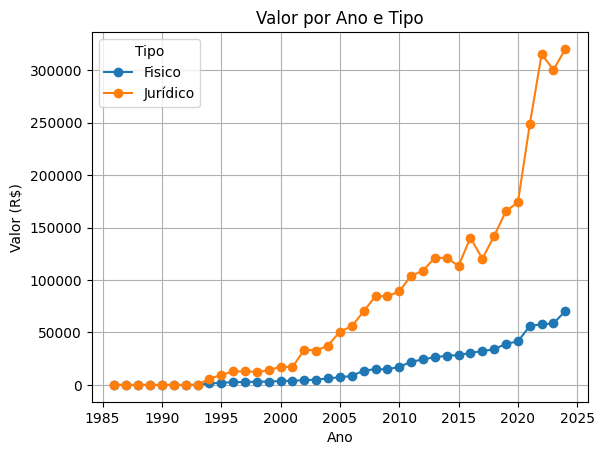

In [34]:
import matplotlib.pyplot as plt

# Primeiro agrupamos para garantir que temos o VALUE por ano para cada TIPO
grouped = imposto_total.groupby(['YEAR', 'TIPO'])['VALUE (R$)'].sum().unstack()

# Agora plotamos
grouped.plot(marker='o')

plt.xlabel('Ano')
plt.ylabel('Valor (R$)')
plt.title('Valor por Ano e Tipo')
plt.grid(True)
plt.legend(title='Tipo')
plt.show()

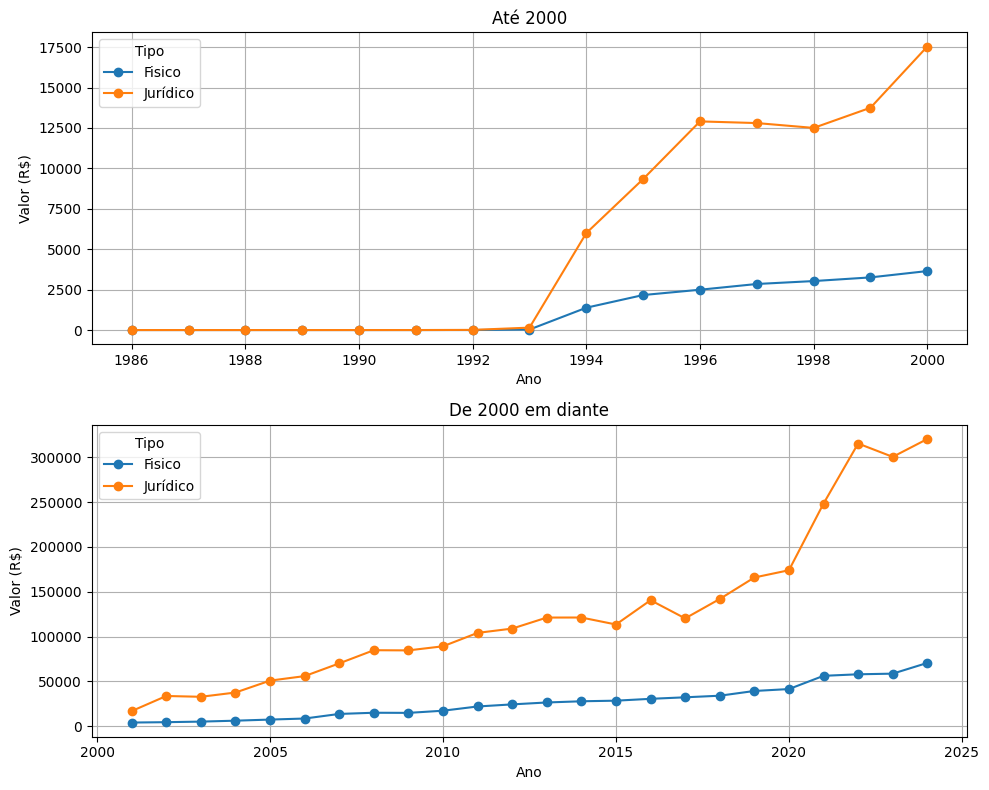

In [35]:
# Primeiro agrupamos como antes
grouped = imposto_total.groupby(['YEAR', 'TIPO'])['VALUE (R$)'].sum().unstack()

# Separando em 2 DataFrames
grouped_ate_2000 = grouped[grouped.index <= 2000]
grouped_depois_2000 = grouped[grouped.index > 2000]

# Agora plotamos os dois
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 linhas, 1 coluna

# Primeiro gráfico: até 2000
grouped_ate_2000.plot(marker='o', ax=axes[0])
axes[0].set_title('Até 2000')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor (R$)')
axes[0].grid(True)
axes[0].legend(title='Tipo')

# Segundo gráfico: de 2000 em diante
grouped_depois_2000.plot(marker='o', ax=axes[1])
axes[1].set_title('De 2000 em diante')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Valor (R$)')
axes[1].grid(True)
axes[1].legend(title='Tipo')

plt.tight_layout()  # Ajusta o espaço entre os gráficos
plt.show()

In [48]:
ICMS = ipea.timeseries('CONFAZ12_ICMSN12')

icms_grouped_years = ICMS.groupby('YEAR')['VALUE (R$)'].sum().reset_index(name='VALOR')
icms_grouped_years

,YEAR,VALOR
0,1980,2.210542e-04
1,1981,4.399305e-04
2,1982,8.973673e-04
3,1983,1.996400e-03
4,1984,6.668767e-03
5,1985,2.578182e-02
6,1986,8.079782e-02
7,1987,2.206149e-01
8,1988,1.564727e+00
9,1989,2.793745e+01


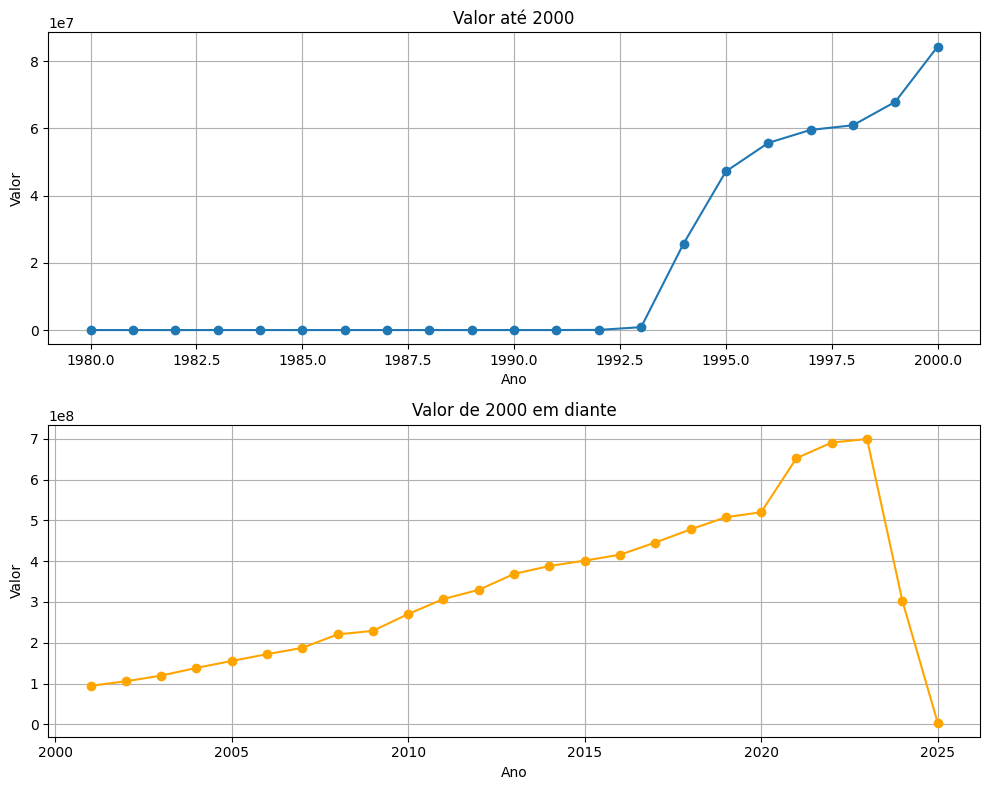

In [ ]:
import pandas as pd



df_ate_2000 = icms_grouped_years[icms_grouped_years['YEAR'] <= 2000]
df_depois_2000 = icms_grouped_years[icms_grouped_years['YEAR'] > 2000]

# Criando os subplots (2 gráficos)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Primeiro gráfico: até 2000
axes[0].plot(df_ate_2000['YEAR'], df_ate_2000['VALOR'], marker='o')
axes[0].set_title('Valor até 2000')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor')
axes[0].grid(True)

# Segundo gráfico: de 2000 em diante
axes[1].plot(df_depois_2000['YEAR'], df_depois_2000['VALOR'], marker='o', color='orange')
axes[1].set_title('Valor de 2000 em diante')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Valor')
axes[1].grid(True)

plt.tight_layout()
plt.show()



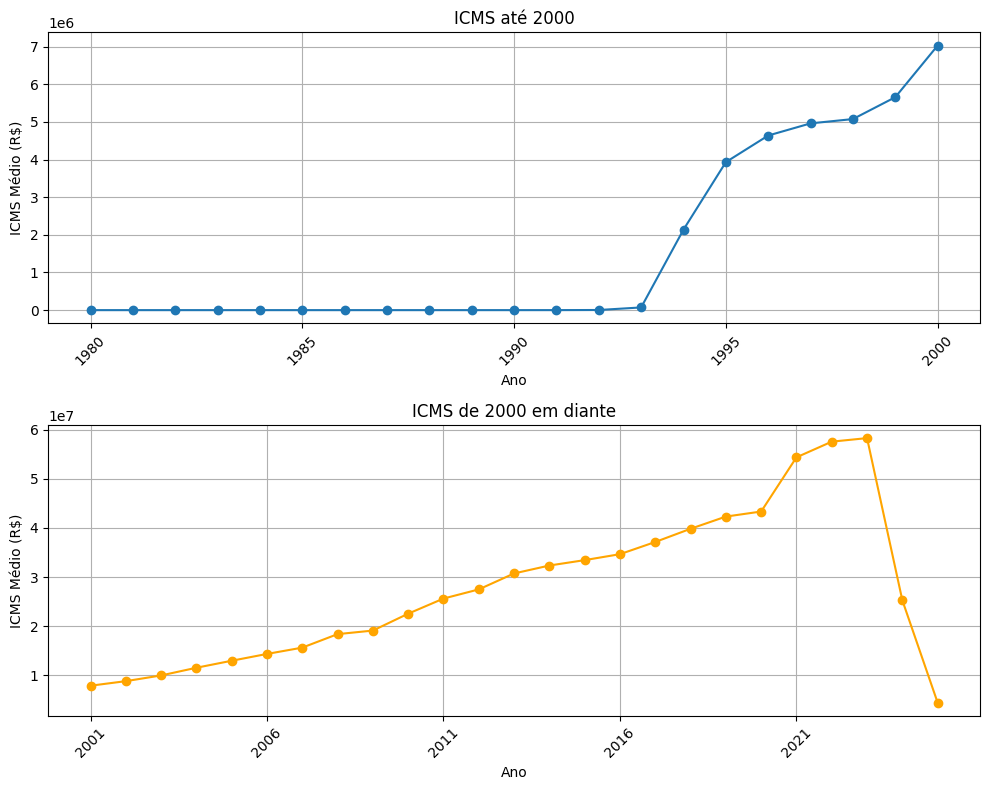

In [41]:
import pandas as pd
import numpy as np

ICMS = ipea.timeseries('CONFAZ12_ICMSN12')

# Primeiro: agrupar por YEAR fazendo a média
df_media = ICMS.groupby('YEAR', as_index=False)['VALUE (R$)'].mean()

# Separar os dados
df_ate_2000 = df_media[df_media['YEAR'] <= 2000]
df_depois_2000 = df_media[df_media['YEAR'] > 2000]

# Criar os gráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Primeiro gráfico: até 2000
axes[0].plot(df_ate_2000['YEAR'], df_ate_2000['VALUE (R$)'], marker='o')
axes[0].set_title('ICMS até 2000')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('ICMS Médio (R$)')
axes[0].grid(True)
# Colocar apenas alguns anos (ex: de 5 em 5)
anos_ate_2000 = np.arange(df_ate_2000['YEAR'].min(), df_ate_2000['YEAR'].max()+1, 5)
axes[0].set_xticks(anos_ate_2000)
axes[0].tick_params(axis='x', rotation=45)

# Segundo gráfico: de 2000 em diante
axes[1].plot(df_depois_2000['YEAR'], df_depois_2000['VALUE (R$)'], marker='o', color='orange')
axes[1].set_title('ICMS de 2000 em diante')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('ICMS Médio (R$)')
axes[1].grid(True)
# Colocar apenas alguns anos (ex: de 5 em 5)
anos_depois_2000 = np.arange(df_depois_2000['YEAR'].min(), df_depois_2000['YEAR'].max()+1, 5)
axes[1].set_xticks(anos_depois_2000)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


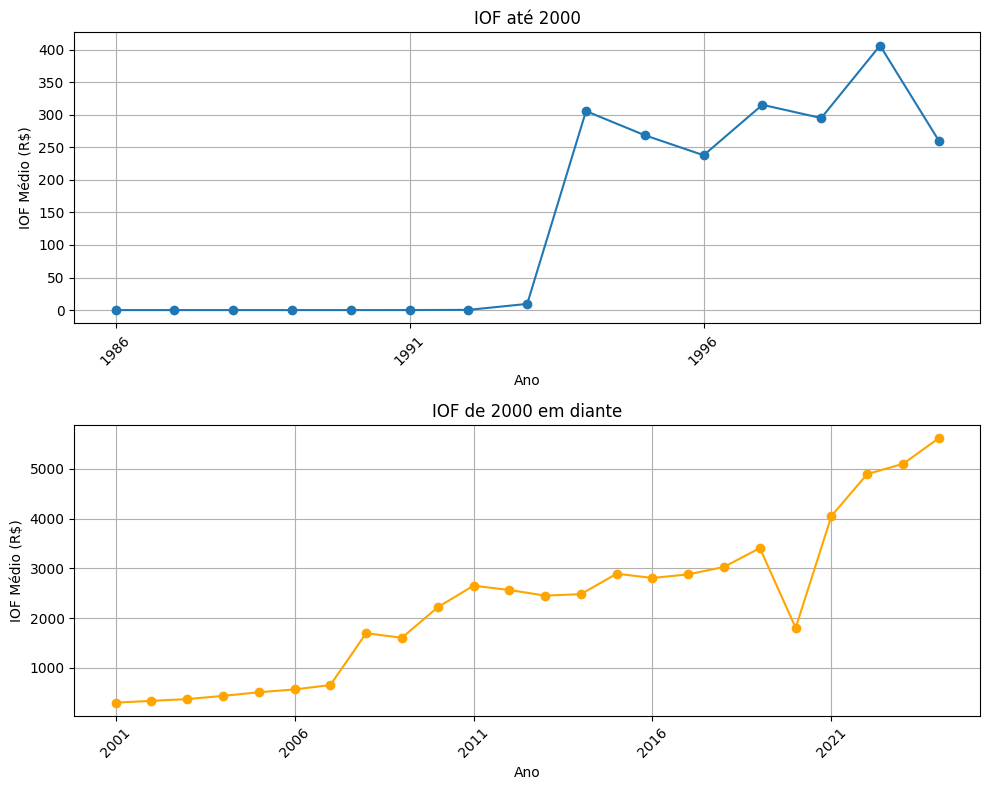

In [54]:
import pandas as pd
import numpy as np

iof = ipea.timeseries('SRF12_IOF12')

# Primeiro: agrupar por YEAR fazendo a média
df_media = iof.groupby('YEAR', as_index=False)['VALUE (R$)'].mean()

# Separar os dados
df_ate_2000 = df_media[df_media['YEAR'] <= 2000]
df_depois_2000 = df_media[df_media['YEAR'] > 2000]

# Criar os gráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Primeiro gráfico: até 2000
axes[0].plot(df_ate_2000['YEAR'], df_ate_2000['VALUE (R$)'], marker='o')
axes[0].set_title('IOF até 2000')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('IOF Médio (R$)')
axes[0].grid(True)
# Colocar apenas alguns anos (ex: de 5 em 5)
anos_ate_2000 = np.arange(df_ate_2000['YEAR'].min(), df_ate_2000['YEAR'].max()+1, 5)
axes[0].set_xticks(anos_ate_2000)
axes[0].tick_params(axis='x', rotation=45)

# Segundo gráfico: de 2000 em diante
axes[1].plot(df_depois_2000['YEAR'], df_depois_2000['VALUE (R$)'], marker='o', color='orange')
axes[1].set_title('IOF de 2000 em diante')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('IOF Médio (R$)')
axes[1].grid(True)
# Colocar apenas alguns anos (ex: de 5 em 5)
anos_depois_2000 = np.arange(df_depois_2000['YEAR'].min(), df_depois_2000['YEAR'].max()+1, 5)
axes[1].set_xticks(anos_depois_2000)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [2]:
df

df_filtrado = df[df['NAME'].str.contains('arrecadação', case=False, na=False)]

df_filtrado


,CODE,NAME
657,IPTUCH,Arrecadação do IPTU incluindo receitas da dívi...
658,ISSCH,Arrecadação do ISS incluindo receitas da dívid...
659,ITBICH,Arrecadação do ITBI incluindo receitas da dívi...
660,MPAS12_ARRBT12,Previdência Social - fluxo de caixa da previdê...
661,MPAS12_ARRLIQ12,Previdência Social - fluxo de caixa da previdê...
670,RECPROPCH,Arrecadação total dos impostos municipais (IPT...
703,SRF12_TOTGER12,Arrecadação das receitas federais - receita bruta


In [3]:
df_arrecadacao_federal_rb = ipea.timeseries('SRF12_TOTGER12')

df_arrecadacao_federal_rb_limpo = df_arrecadacao_federal_rb.rename(columns={
    'CODE': 'code',
    'RAW DATE': 'raw_date',
    'DAY': 'day',
    'MONTH': 'month',
    'YEAR': 'year',
    'VALUE (R$)': 'real_value'
})


df_arrecadacao_federal_rb_limpo.columns

df_arrecadacao_federal_rb_limpo['real_value'] = df_arrecadacao_federal_rb_limpo['real_value'] * 1_000_000 # multiplicando pra ficar no numero bruto

df_arrecadacao_federal_rb_limpo['real_value'] = df_arrecadacao_federal_rb_limpo['real_value'].round(2)

df_arrecadacao_federal_rb_limpo



,code,raw_date,day,month,year,real_value
DATE,,,,,,
1993-01-01,SRF12_TOTGER12,1993-01-01T00:00:00-02:00,1,1,1993,3.059528e+07
1993-02-01,SRF12_TOTGER12,1993-02-01T00:00:00-02:00,1,2,1993,3.465490e+07
1993-03-01,SRF12_TOTGER12,1993-03-01T00:00:00-03:00,1,3,1993,4.158396e+07
1993-04-01,SRF12_TOTGER12,1993-04-01T00:00:00-03:00,1,4,1993,5.819186e+07
1993-05-01,SRF12_TOTGER12,1993-05-01T00:00:00-03:00,1,5,1993,8.717628e+07
...,...,...,...,...,...,...
2024-08-01,SRF12_TOTGER12,2024-08-01T00:00:00-03:00,1,8,2024,2.016221e+11
2024-09-01,SRF12_TOTGER12,2024-09-01T00:00:00-03:00,1,9,2024,2.031687e+11
2024-10-01,SRF12_TOTGER12,2024-10-01T00:00:00-03:00,1,10,2024,2.479203e+11


In [ ]:
arquivo = 'https://seculoxx.ibge.gov.br/images/seculoxx/economia/financas_publicas/fp01_receitadespesauniao.xls'

df_receita = pd.read_excel(arquivo)

df_receita = df_receita.rename(columns={'Receita e despesa da União': 'Ano', 
                                        'Unnamed: 1': 'Receita Arrecadada', 
                                        'Unnamed: 2': 'Despesa realizada', 
                                        'Unnamed: 3': 'Superavit(+) ou Deficit(-)'})

df_receita['Ano'] = pd.to_numeric(df_receita['Ano'], errors='coerce')

df_receita['Ano'] = df_receita['Ano'].fillna(0).astype(int)


df_filtrado = df_receita[(df_receita['Ano'] >= 1980) & (df_receita['Ano'] <= 1993)]

def map_moeda(ano):
    if 1970 <= ano <= 1985:
        return "Milhares de cruzeiros (Cr$ 1.000)"
    elif 1986 <= ano <= 1988:
        return "Milhares de cruzados (Cz$ 1.000)"
    elif ano == 1989:
        return "Milhares de cruzados novos (NCz$ 1.000)"
    elif 1990 <= ano <= 1992:
        return "Milhares de cruzeiros (Cr$ 1.000)"
    elif ano == 1993:
        return "Milhares de cruzeiros reais (CR$ 1.000)"
    else:
        return "Moeda não definida"
    
df_filtrado['moeda'] = df_filtrado['Ano'].apply(map_moeda)


df_filtrado

C:\Users\Dogec\AppData\Local\Temp\ipykernel_17244\513175933.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['moeda'] = df_filtrado['Ano'].apply(map_moeda)


,Ano,Receita Arrecadada,Despesa realizada,Superavit(+) ou Deficit(-),moeda
87,1980,1230018000,1190994000,39024000,Milhares de cruzeiros (Cr$ 1.000)
88,1981,2351966000,2254895000,97071000,Milhares de cruzeiros (Cr$ 1.000)
89,1982,4774815000,4619772000,155043000,Milhares de cruzeiros (Cr$ 1.000)
90,1983,11779847000,11104585000,675262000,Milhares de cruzeiros (Cr$ 1.000)
91,1984,36414053000,33817215000,2596838000,Milhares de cruzeiros (Cr$ 1.000)
92,1985,134851122000,130425844000,4425278000,Milhares de cruzeiros (Cr$ 1.000)
94,1986,562828690,548108711,14719979,Milhares de cruzados (Cz$ 1.000)
95,1987,1692405901,1615099596,77306305,Milhares de cruzados (Cz$ 1.000)
96,1988,15949586311,15857926137,91660174,Milhares de cruzados (Cz$ 1.000)
98,1989,547059356,577265809,-30206453,Milhares de cruzados novos (NCz$ 1.000)


In [5]:
import pandas as pd

url = 'https://www.gov.br/receitafederal/pt-br/acesso-a-informacao/dados-abertos/receitadata/arrecadacao/serie-historica/arrecadacao-das-receitas-federais-1994-a-2023.xlsx/@@download/file'

file = pd.read_excel(url, skiprows=5)
file


,RECEITAS,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,TOTAL
0,IMPOSTO SOBRE IMPORTAÇÃO,147.221142,132.452536,172.397915,164.374415,175.717996,228.847365,215.508572,253.236448,201.939865,202.350632,238.745427,251.347797,2384.140110
1,IMPOSTO SOBRE EXPORTAÇÃO,0.107063,0.074745,0.081114,0.080893,0.141279,0.130388,0.116850,0.126686,0.129446,0.209079,0.145422,0.234746,1.577712
2,I.P.I-TOTAL,738.141868,719.867068,813.855900,744.822305,771.491793,807.183351,733.623039,934.240100,928.565035,954.892935,1090.141424,1186.491718,10423.316535
3,I.P.I-FUMO,150.454916,115.571667,123.503365,133.889455,132.965943,139.813800,109.257115,158.959596,162.673734,175.443916,168.681279,186.691220,1757.906006
4,I.P.I-BEBIDAS,79.470192,80.681528,73.900925,56.624269,59.110553,64.326873,57.133703,83.603825,89.338018,97.594478,104.795866,119.017651,965.597882
5,I.P.I-AUTOMÓVEIS,47.640745,48.732452,63.638331,49.032465,67.861415,82.089089,63.353279,58.161627,41.010410,25.556669,70.760752,66.078072,683.915306
6,I.P.I-VINCULADO À IMPORTAÇÃO,85.952680,76.649979,106.810032,102.765259,101.494796,117.974106,111.005420,149.996296,123.660733,139.010933,177.178425,203.998338,1496.496997
7,I.P.I-OUTROS,374.623335,398.231442,446.003247,402.510856,410.059085,402.979482,392.873522,483.518756,511.882140,517.286939,568.725102,610.706437,5519.400344
8,IMPOSTO SOBRE A RENDA-TOTAL,1674.918912,1352.598158,1250.215937,1881.644983,1483.348231,1517.724947,1358.081313,1475.964229,1528.920671,1439.167988,1513.965236,2397.039415,18873.590021
9,I.RENDA-PESSOA FÍSICA,56.738991,62.240758,70.543541,150.767369,260.038284,231.769103,108.628523,109.810050,108.763979,106.174784,55.952889,60.139720,1381.567992
